In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [4]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

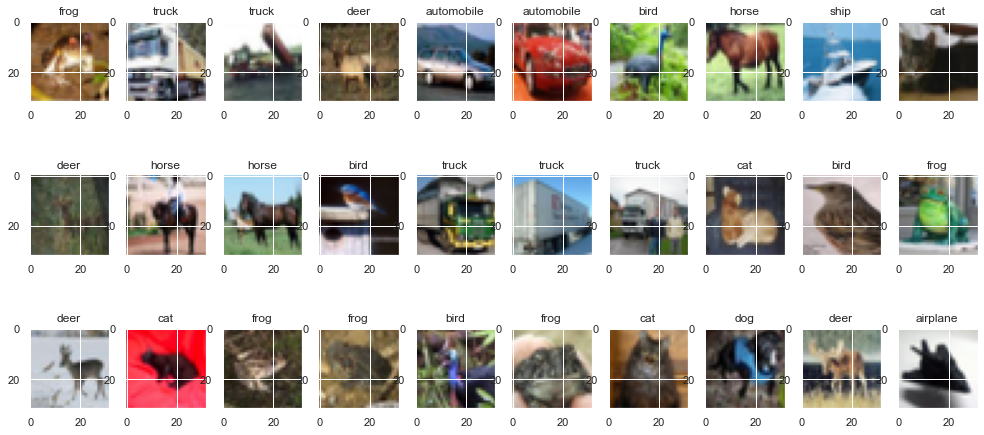

In [5]:
fig, axes = plt.subplots(ncols=10, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(10):
        axes[i,j].set_title(cifar10_classes[y_train[index][0]])
        axes[i,j].imshow(x_train[index])
        axes[i,j].get_xaxis().set_visible(True)
        axes[i,j].get_yaxis().set_visible(True)
        index += 1
plt.show()

In [6]:
import keras
import keras.utils
from keras import utils as np_utils
x_train2 = (x_train/255) - 0.5
x_test2 = (x_test/255) - 0.5
y_train2 = keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test,NUM_CLASSES)

In [7]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [8]:
one_hot_encoder.fit(y_train)

OneHotEncoder(sparse=False)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout
from keras.layers.advanced_activations import LeakyReLU

In [18]:

    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32, 3)))
    model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (2,2), strides = None,padding = 'valid',data_format = None))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32, 3)))
    model.add(Conv2D(64, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (2,2), strides = None,padding = 'valid',data_format = None))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, input_shape = (256, )))
    model.add(Dense(NUM_CLASSES))
    model.add(LeakyReLU(0.1))
    model.add(Activation('softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

In [20]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [21]:
history = model.fit(x_train2, y_train2, epochs=10, batch_size=32, validation_data=(x_test2, y_test2), callbacks=[es])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 236s 5ms/step - loss: 1.3329 - acc: 0.5238 - val_loss: 1.0186 - val_acc: 0.6311
Epoch 2/10
50000/50000 [==============================] - 234s 5ms/step - loss: 0.9645 - acc: 0.6595 - val_loss: 0.8770 - val_acc: 0.6917
Epoch 3/10
50000/50000 [==============================] - 234s 5ms/step - loss: 0.8513 - acc: 0.7020 - val_loss: 0.8152 - val_acc: 0.7153
Epoch 4/10
50000/50000 [==============================] - 234s 5ms/step - loss: 0.7818 - acc: 0.7286 - val_loss: 0.7957 - val_acc: 0.7214
Epoch 5/10
50000/50000 [==============================] - 212s 4ms/step - loss: 0.7364 - acc: 0.7429 - val_loss: 0.7757 - val_acc: 0.7284
Epoch 6/10
50000/50000 [==============================] - 208s 4ms/step - loss: 0.6940 - acc: 0.7571 - val_loss: 0.7968 - val_acc: 0.7309
Epoch 7/10
50000/50000 [==============================] - 209s 4ms/step - loss: 0.6708 - acc: 0.7632 - val_loss: 0.7181 - 

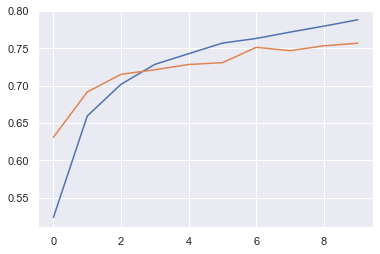

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show() 

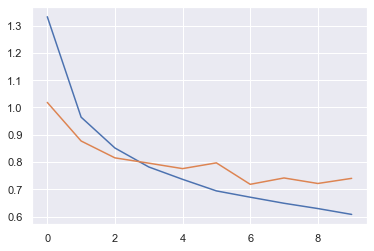

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [24]:
predictions = model.predict(x_test2)

In [25]:
predictions = one_hot_encoder.inverse_transform(predictions)

In [26]:
predictions

array([[3],
       [8],
       [1],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [27]:
y_test2 = one_hot_encoder.inverse_transform(y_test2)

In [28]:
y_test2

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [29]:
cm = confusion_matrix(y_test2, predictions)

In [30]:
cm

array([[757,  18,  26,  31,  11,   1,  11,   6,  53,  86],
       [  6, 878,   1,   3,   1,   1,   7,   0,   6,  97],
       [ 64,   4, 536,  73,  89,  60, 128,  18,   9,  19],
       [ 11,   8,  27, 677,  45,  92,  79,  21,  10,  30],
       [ 12,   7,  30,  72, 715,  26,  81,  43,   7,   7],
       [  9,   5,  28, 206,  30, 633,  35,  31,  10,  13],
       [  5,   6,  15,  62,  19,   7, 881,   0,   1,   4],
       [ 10,   5,  24,  49,  48,  63,  16, 753,   3,  29],
       [ 43,  40,   4,  13,   3,   3,  12,   5, 833,  44],
       [  8,  51,   3,   8,   3,   5,   5,   4,   7, 906]], dtype=int64)

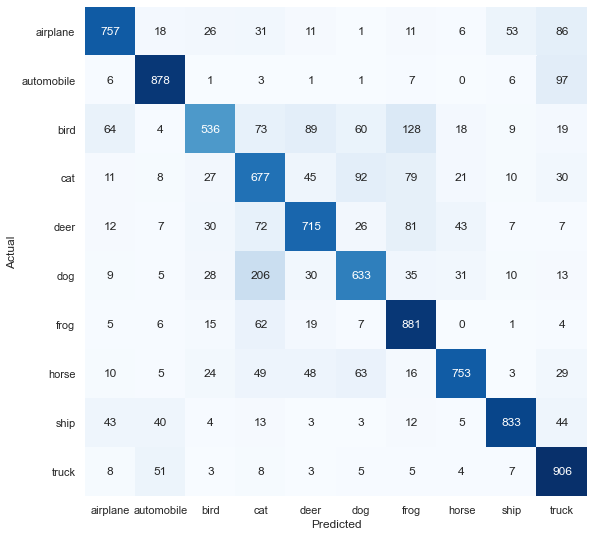

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=cifar10_classes, yticklabels=cifar10_classes, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

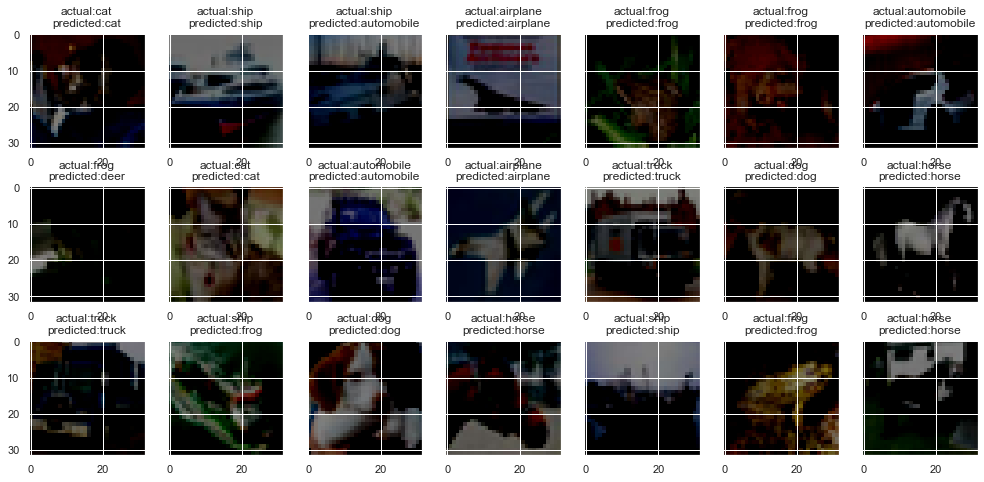

In [39]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + cifar10_classes[y_test2[index][0]] + '\n' 
                            + 'predicted:' + cifar10_classes[predictions[index][0]])
        axes[i,j].imshow(x_test2[index])
        axes[i,j].get_xaxis().set_visible(True)
        axes[i,j].get_yaxis().set_visible(True)
        index += 1
plt.show()